# Weather_data_set_Analysis

In [110]:
# import the neccessary module for operations

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sqlalchemy import create_engine

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format # Show numbers in 2 d.p

In [2]:
# importing from the csv file
nyc_weather_df = pd.read_csv('./excel_files/nyc_weather.csv')
nyc_weather_df.head()

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.00,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.00,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.00,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.00,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.00,0,0,NaN,333


In [3]:
# checking for total null values
nyc_weather_df.isnull().sum()

EST                      0
Temperature              0
DewPoint                 0
Humidity                 0
Sea Level PressureIn     0
VisibilityMiles          0
WindSpeedMPH             3
PrecipitationIn          0
CloudCover               0
Events                  22
WindDirDegrees           0
dtype: int64

In [4]:
# fill the null values of the column WindSpeedMPH with value
nyc_weather_df["WindSpeedMPH"].fillna(0, inplace = True) 
# confirm records
nyc_weather_df.isna().sum()

EST                      0
Temperature              0
DewPoint                 0
Humidity                 0
Sea Level PressureIn     0
VisibilityMiles          0
WindSpeedMPH             0
PrecipitationIn          0
CloudCover               0
Events                  22
WindDirDegrees           0
dtype: int64

In [5]:
# fill the null values of the column Events with value
nyc_weather_df["Events"].fillna("Unknown", inplace = True) 
# confirm records
nyc_weather_df.isna().sum()

EST                     0
Temperature             0
DewPoint                0
Humidity                0
Sea Level PressureIn    0
VisibilityMiles         0
WindSpeedMPH            0
PrecipitationIn         0
CloudCover              0
Events                  0
WindDirDegrees          0
dtype: int64

In [6]:
# analysising the dataframe structure
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     object 
 1   Temperature           31 non-null     int64  
 2   DewPoint              31 non-null     int64  
 3   Humidity              31 non-null     int64  
 4   Sea Level PressureIn  31 non-null     float64
 5   VisibilityMiles       31 non-null     int64  
 6   WindSpeedMPH          31 non-null     float64
 7   PrecipitationIn       31 non-null     object 
 8   CloudCover            31 non-null     int64  
 9   Events                31 non-null     object 
 10  WindDirDegrees        31 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ KB


In [7]:
# investigating the dataframe statistical summary
nyc_weather_df.describe()

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,34.68,17.84,51.68,29.99,9.19,6.23,3.13,247.13
std,7.64,11.38,11.63,0.24,1.94,3.42,2.63,92.31
min,20.00,-3.00,33.00,29.52,1.00,0.00,0.00,34.00
25%,29.00,10.00,44.50,29.86,9.00,5.00,1.00,238.00
50%,35.00,18.00,50.00,30.01,10.00,6.00,3.00,281.00
75%,39.50,23.00,55.00,30.14,10.00,8.00,4.50,300.00
max,50.00,46.00,78.00,30.57,10.00,16.00,8.00,345.00


In [8]:
# analysing the columns for space
nyc_weather_df.columns

Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')

In [9]:
# filtering the space in the column names
nyc_weather_df.columns = [x.replace(' ', '_') for x in nyc_weather_df.columns]
nyc_weather_df.columns = nyc_weather_df.columns.str.replace(r"\_$","", regex=True)
nyc_weather_df.columns

Index(['EST', 'Temperature', 'DewPoint', 'Humidity', 'Sea_Level_PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Events', 'WindDirDegrees'],
      dtype='object')

In [10]:
# Changing all the columns to its appropriate data type
number_columns = ['EST','Events']
for column in number_columns:
    nyc_weather_df[column] = nyc_weather_df[column].astype ("string")
    
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     string 
 1   Temperature           31 non-null     int64  
 2   DewPoint              31 non-null     int64  
 3   Humidity              31 non-null     int64  
 4   Sea_Level_PressureIn  31 non-null     float64
 5   VisibilityMiles       31 non-null     int64  
 6   WindSpeedMPH          31 non-null     float64
 7   PrecipitationIn       31 non-null     object 
 8   CloudCover            31 non-null     int64  
 9   Events                31 non-null     string 
 10  WindDirDegrees        31 non-null     int64  
dtypes: float64(2), int64(6), object(1), string(2)
memory usage: 2.8+ KB


In [11]:
# Changing all the columns to its appropriate data type
number_columns = ['Temperature','DewPoint','Humidity','VisibilityMiles','CloudCover']
for column in number_columns:
    nyc_weather_df[column] = nyc_weather_df[column].astype ("int8")
    
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     string 
 1   Temperature           31 non-null     int8   
 2   DewPoint              31 non-null     int8   
 3   Humidity              31 non-null     int8   
 4   Sea_Level_PressureIn  31 non-null     float64
 5   VisibilityMiles       31 non-null     int8   
 6   WindSpeedMPH          31 non-null     float64
 7   PrecipitationIn       31 non-null     object 
 8   CloudCover            31 non-null     int8   
 9   Events                31 non-null     string 
 10  WindDirDegrees        31 non-null     int64  
dtypes: float64(2), int64(1), int8(5), object(1), string(2)
memory usage: 1.7+ KB


In [12]:
# Changing the WindDirDegrees column to its appropriate data type
nyc_weather_df['WindDirDegrees'] = nyc_weather_df['WindDirDegrees'].astype ("int16")
    
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     string 
 1   Temperature           31 non-null     int8   
 2   DewPoint              31 non-null     int8   
 3   Humidity              31 non-null     int8   
 4   Sea_Level_PressureIn  31 non-null     float64
 5   VisibilityMiles       31 non-null     int8   
 6   WindSpeedMPH          31 non-null     float64
 7   PrecipitationIn       31 non-null     object 
 8   CloudCover            31 non-null     int8   
 9   Events                31 non-null     string 
 10  WindDirDegrees        31 non-null     int16  
dtypes: float64(2), int16(1), int8(5), object(1), string(2)
memory usage: 1.6+ KB


In [13]:
# Changing all the columns to its appropriate data type
number_columns = ['Sea_Level_PressureIn','WindSpeedMPH']
for column in number_columns:
    nyc_weather_df[column] = nyc_weather_df[column].astype ("float16")
    
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     string 
 1   Temperature           31 non-null     int8   
 2   DewPoint              31 non-null     int8   
 3   Humidity              31 non-null     int8   
 4   Sea_Level_PressureIn  31 non-null     float16
 5   VisibilityMiles       31 non-null     int8   
 6   WindSpeedMPH          31 non-null     float16
 7   PrecipitationIn       31 non-null     object 
 8   CloudCover            31 non-null     int8   
 9   Events                31 non-null     string 
 10  WindDirDegrees        31 non-null     int16  
dtypes: float16(2), int16(1), int8(5), object(1), string(2)
memory usage: 1.2+ KB


In [14]:
# converting the PrecipitationIn column to its appropriate data type
nyc_weather_df["PrecipitationIn"] = nyc_weather_df["PrecipitationIn"].astype ("string")
nyc_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EST                   31 non-null     string 
 1   Temperature           31 non-null     int8   
 2   DewPoint              31 non-null     int8   
 3   Humidity              31 non-null     int8   
 4   Sea_Level_PressureIn  31 non-null     float16
 5   VisibilityMiles       31 non-null     int8   
 6   WindSpeedMPH          31 non-null     float16
 7   PrecipitationIn       31 non-null     string 
 8   CloudCover            31 non-null     int8   
 9   Events                31 non-null     string 
 10  WindDirDegrees        31 non-null     int16  
dtypes: float16(2), int16(1), int8(5), string(3)
memory usage: 1.2 KB


In [15]:
# displaying the first 7 records from the data frame
nyc_weather_df[:7]

,EST,Temperature,DewPoint,Humidity,Sea_Level_PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.00,0,5,Unknown,281
1,1/2/2016,36,18,46,30.02,10,7.00,0,3,Unknown,275
2,1/3/2016,40,21,47,29.86,10,8.00,0,1,Unknown,277
3,1/4/2016,25,9,44,30.05,10,9.00,0,3,Unknown,345
4,1/5/2016,20,-3,41,30.56,10,5.00,0,0,Unknown,333
5,1/6/2016,33,4,35,30.50,10,4.00,0,0,Unknown,259
6,1/7/2016,39,11,33,30.28,10,2.00,0,3,Unknown,293


# Exploratory Analysis on the Weather dataset

In [16]:
#1 Average Conditions by Weather Event

In [17]:
# Mean temperature per event
avg_temp_event = nyc_weather_df.groupby("Events")["Temperature"].mean().sort_values(ascending=False).reset_index()
print("\nAverage Temperature by Event:\n", avg_temp_event)



Average Temperature by Event:
      Events  Temperature
0      Rain        45.50
1   Unknown        34.18
2  Fog-Snow        31.00
3      Snow        26.33


In [18]:
# Average Humidity by Weather Event
avg_humidity_event = nyc_weather_df.groupby("Events")["Humidity"].mean().sort_values(ascending=False)
print("Average Humidity by Event:\n", avg_humidity_event)


Average Humidity by Event:
 Events
Fog-Snow   72.00
Rain       65.75
Snow       49.00
Unknown    47.64
Name: Humidity, dtype: float64


In [19]:
# Temperature & Humidity combined summary
event_summary = nyc_weather_df.groupby("Events")[["Temperature", "Humidity"]].mean()
print("\n Temperature & Humidity Summary by Event:\n", event_summary)


 Temperature & Humidity Summary by Event:
           Temperature  Humidity
Events                         
Fog-Snow        31.00     72.00
Rain            45.50     65.75
Snow            26.33     49.00
Unknown         34.18     47.64


In [20]:
#2 Maximum Precipitation events

In [21]:
# Days with Maximum Precipitation for unclean precipitation
max_rain = nyc_weather_df.loc[nyc_weather_df["PrecipitationIn"] == nyc_weather_df["PrecipitationIn"].max()]
print("Day(s) with Maximum Precipitation:\n", max_rain[["EST", "PrecipitationIn", "Events"]])


Day(s) with Maximum Precipitation:
           EST PrecipitationIn   Events
8    1/9/2016               T     Rain
11  1/12/2016               T  Unknown
13  1/14/2016               T  Unknown
14  1/15/2016               T  Unknown
17  1/18/2016               T     Snow
23  1/24/2016               T     Snow
26  1/27/2016               T     Rain


In [22]:
# When PrecipitationIn has "T" for trace amounts (meaning rainfall was too small to measure),
# pandas treats it as a string → which breaks .max() since it compares text, not numbers.
# replace "T" with a very small value like 0.001 (to keep the distinction) to a new column
nyc_weather_df["PrecipitationClean"] = (
    nyc_weather_df["PrecipitationIn"]
    .replace("T", 0.001)   # keep as tiny value
)
nyc_weather_df["PrecipitationClean"] = pd.to_numeric(
    nyc_weather_df["PrecipitationClean"], errors="coerce"
)
nyc_weather_df["PrecipitationClean"]= nyc_weather_df["PrecipitationClean"].astype ("float16")
max_rain = nyc_weather_df.loc[
    nyc_weather_df["PrecipitationClean"] == nyc_weather_df["PrecipitationClean"].max(),
    ["EST", "PrecipitationClean", "Events", "Temperature"]
]
max_rain

,EST,PrecipitationClean,Events,Temperature
22,1/23/2016,2.31,Fog-Snow,26


In [23]:
#3 statiscal sumary of Hottest & Coldest Days

In [24]:
nyc_weather_df['NEW_EST'] = pd.to_datetime(nyc_weather_df['EST'])
# Hottest & Coldest Days
hottest = nyc_weather_df.loc[nyc_weather_df["Temperature"] == nyc_weather_df["Temperature"].max()]
coldest = nyc_weather_df.loc[nyc_weather_df["Temperature"] == nyc_weather_df["Temperature"].min()]



print("Hottest Day:\n", hottest[["EST", "Temperature", "Events"]])
print("\nColdest Day:\n", coldest[["EST", "Temperature", "Events"]])


Hottest Day:
          EST  Temperature Events
9  1/10/2016           50   Rain

Coldest Day:
         EST  Temperature   Events
4  1/5/2016           20  Unknown


# Visualizations Using Ploty



In [30]:
# !pip install -U kaleido
# pip install --upgrade kaleido

Defaulting to user installation because normal site-packages is not writeable


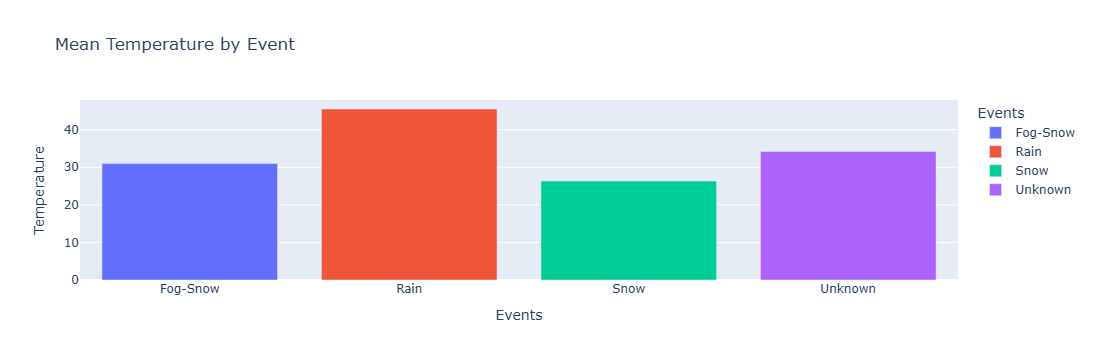

In [29]:
#1 Mean Temperature per Event
temp_event = nyc_weather_df.groupby("Events")["Temperature"].mean().reset_index()

fig = px.bar(temp_event, x="Events", y="Temperature",
             title="Mean Temperature by Event", color="Events")
fig.write_image("images/Mean_Temperature_per_Event.png")
fig.show()


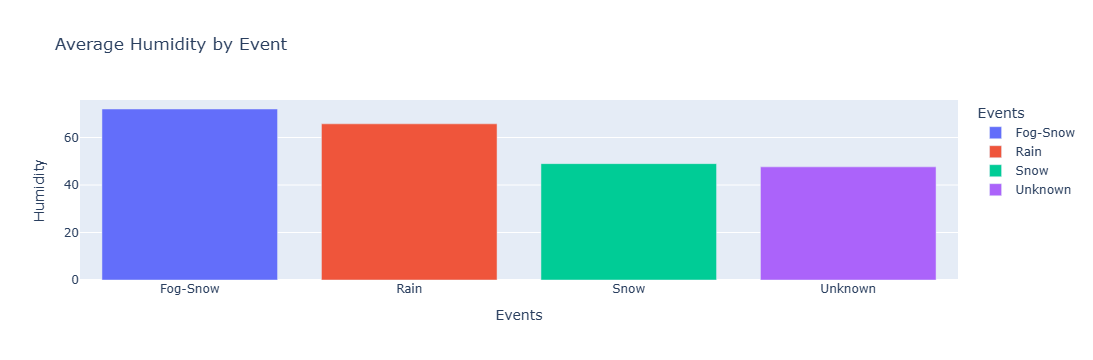

In [30]:
#2 Average Humidity by Event
humidity_event = nyc_weather_df.groupby("Events")["Humidity"].mean().reset_index()

fig = px.bar(humidity_event, x="Events", y="Humidity",
             title="Average Humidity by Event", color="Events")
fig.write_image("images/Average_Humidity_by_Event.png")
fig.show()


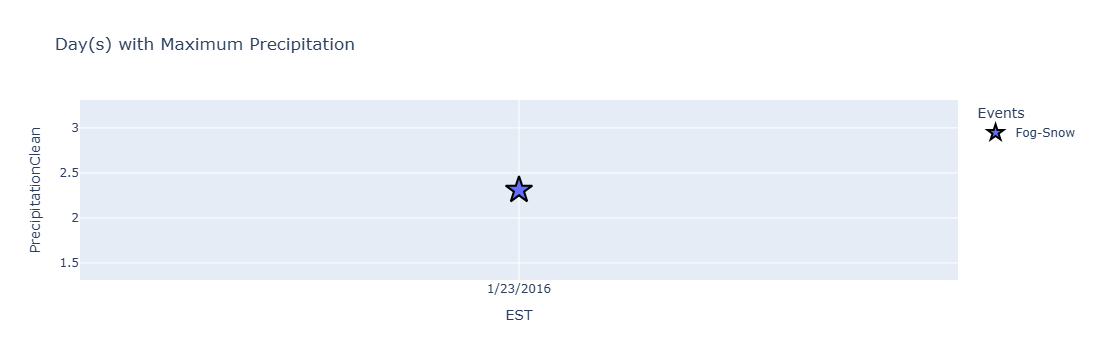

In [31]:
#3 Find max precipitation day(s) by ploty

fig = px.scatter(
    max_rain,
    x="EST", y="PrecipitationClean",
    color="Events",
    size="Temperature",
    title=" Day(s) with Maximum Precipitation",
    hover_data=["Temperature"]
)

# Better markers
fig.update_traces(marker=dict(symbol="star", size=20, line=dict(width=2, color="black")))
fig.write_image("images/max_precipitation_by_day(s).png")
fig.show()



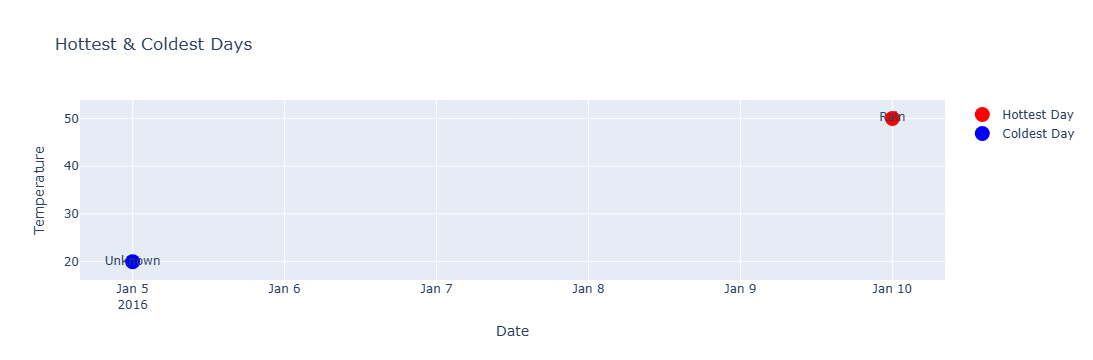

In [32]:
#4 visualization graph for the hottest & coldest days using ploty
fig = go.Figure()

# Hottest day
fig.add_trace(go.Scatter(x=hottest["NEW_EST"], y=hottest["Temperature"],
                         mode="markers+text",
                         name="Hottest Day",
                         text=hottest["Events"],
                         marker=dict(size=15, color="red")))

# Coldest day
fig.add_trace(go.Scatter(x=coldest["NEW_EST"], y=coldest["Temperature"],
                         mode="markers+text",
                         name="Coldest Day",
                         text=coldest["Events"],
                         marker=dict(size=15, color="blue")))

fig.update_layout(title="Hottest & Coldest Days",
                  xaxis_title="Date", yaxis_title="Temperature")
fig.write_image("images/hottest_&_coldest_days.png")
fig.show()
